# **Rossmann Store Sales**

PROBLEM STATEMENT:

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
The goal is to predict next 6 weeks of sales.

In [0]:
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as XGBRegressor

In [3]:
train = pd.read_csv('/content/drive/My Drive/Rossmann store/train.csv',parse_dates=True)
test = pd.read_csv('/content/drive/My Drive/Rossmann store/test.csv',parse_dates=True)
store = pd.read_csv("/content/drive/My Drive/Rossmann store/store.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
print(train["Date"].min(), train["Date"].max())

2013-01-01 2015-07-31


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
train.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [9]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [0]:
test["Open"] = test["Open"].fillna(1)

In [12]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
print(train.shape)
print(test.shape)
print(store.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [14]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [15]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [0]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store.fillna(0, inplace = True)

In [0]:
train1 = pd.merge(train, store, on="Store", how="left")
test1 = pd.merge(test, store, on="Store", how="left")

In [18]:
test1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0


In [0]:
train1.drop("Customers", axis=1, inplace=True)
test_ID = test1["Id"]
test1.drop("Id", axis=1, inplace=True)

In [0]:
num_train = train1.shape[0]

In [0]:
train1['Date'] = pd.to_datetime(train1.Date)
test1['Date'] = pd.to_datetime(test1.Date)

In [0]:
train1['year'] = train1['Date'].dt.year
train1['month'] = train1['Date'].dt.month
train1['day'] = train1['Date'].dt.day
assert np.all(train1["DayOfWeek"] - 1 == train1['Date'].dt.dayofweek)
train1['dayofyear'] = train1['Date'].dt.dayofyear
train1['weekofyear'] = train1['Date'].dt.weekofyear
train1.drop("Date", axis=1, inplace=True)

In [0]:
test1['year'] = test1['Date'].dt.year
test1['month'] = test1['Date'].dt.month
test1['day'] = test1['Date'].dt.day
assert np.all(test1["DayOfWeek"] - 1 == test1['Date'].dt.dayofweek)
test1['dayofyear'] = test1['Date'].dt.dayofyear
test1['weekofyear'] = test1['Date'].dt.weekofyear
test1.drop("Date", axis=1, inplace=True)

In [24]:
train1.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,dayofyear,weekofyear
0,1,5,5263,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212,31
1,2,5,6064,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212,31
2,3,5,8314,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,31
3,4,5,13995,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212,31
4,5,5,4822,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212,31


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


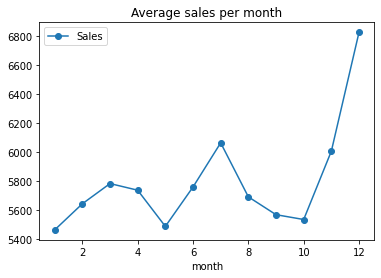

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
avg_sales_per_month = train1.groupby('month')["Sales"].mean()
plt.figure(figsize=(6, 4))
avg_sales_per_month.plot(legend=True, marker='o', title="Average sales per month")

We can see that the sales is high during the month of December.

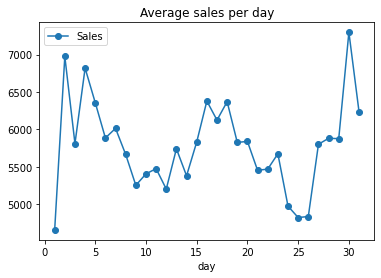

In [26]:
avg_sales_per_day = train1.groupby('day')["Sales"].mean()
plt.figure(figsize=(6, 4))
avg_sales_per_day.plot(legend=True, marker='o', title="Average sales per day")

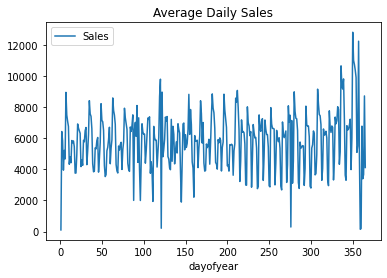

In [27]:
#fig,a =  plt.subplots(1,2)
average_sales_per_day = train1.groupby('dayofyear')["Sales"].mean()
fig = plt.subplots(figsize=(6, 4))
average_sales_per_day.plot(legend=True, title="Average Daily Sales")

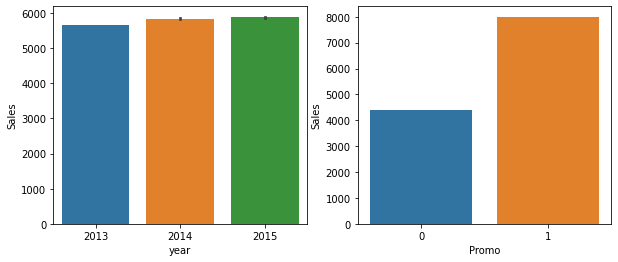

In [28]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,4))

sns.barplot(x='year', y='Sales', data=train1, ax=axis1)
sns.barplot(x='Promo', y='Sales', data=train1, ax=axis2)

We can see that the sales is high when there is promo offer and average increases slightly year wise.

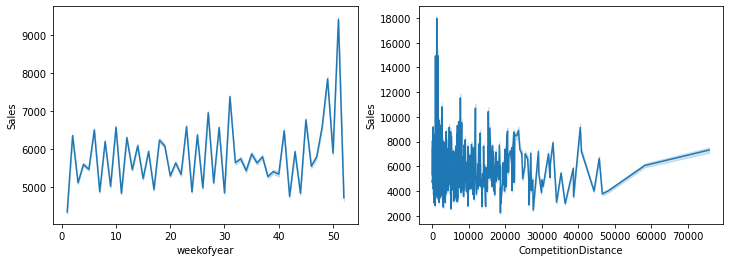

In [29]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.lineplot(x='weekofyear', y='Sales', data=train1, ax=axis1)
sns.lineplot(x='CompetitionDistance', y='Sales', data=train1, ax=axis2)

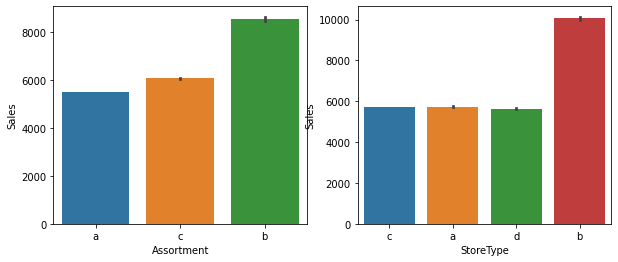

In [30]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,4))

sns.barplot(x='Assortment', y='Sales', data=train1, ax=axis1)
sns.barplot(x='StoreType', y='Sales', data=train1, ax=axis2)

Text(0.5, 1.0, 'Store Daily Open Countplot')

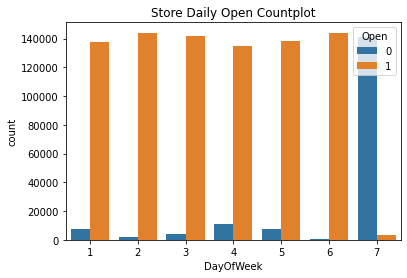

In [31]:
import seaborn as sns
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = train1)
plt.title('Store Daily Open Countplot')

It is seen that most of the stores are closed during the Day 7 of the week.

New Feature Extraction

In [0]:
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
def check(row):
    if isinstance(row['PromoInterval'], str) and month2str[row['month']] in row['PromoInterval']:
        return 1
    else:
        return 0
train1['IsPromoMonth'] =  train1.apply(lambda row: check(row), axis=1) 
test1['IsPromoMonth'] =  test1.apply(lambda row: check(row), axis=1) 
train1.drop("PromoInterval", axis=1, inplace=True)
test1.drop("PromoInterval", axis=1, inplace=True)

In [0]:
train_nn = train1.copy()

In [0]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train1.StoreType.replace(mappings, inplace=True)
train1.Assortment.replace(mappings, inplace=True)
train1.StateHoliday.replace(mappings, inplace=True)
test1.StoreType.replace(mappings, inplace=True)
test1.Assortment.replace(mappings, inplace=True)
test1.StateHoliday.replace(mappings, inplace=True)

In [35]:
train1.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year,month,day,dayofyear,weekofyear,IsPromoMonth
0,1,5,5263,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,212,31,0
1,2,5,6064,1,1,0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31,212,31,1
2,3,5,8314,1,1,0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31,212,31,1
3,4,5,13995,1,1,0,1,3,3,620.0,9.0,2009.0,0,0.0,0.0,2015,7,31,212,31,0
4,5,5,4822,1,1,0,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,31,212,31,0


Train - Test Split:

In [0]:
split_index = 6*7*1115
valid = train1[:split_index] 
train2 = train1[split_index:]

In [0]:
train_total = train1.copy()

In [38]:
print(valid.shape)
print(train2.shape)
print(train_total.shape)

(46830, 21)
(970379, 21)
(1017209, 21)


Selecting data when the sales is greater than zero and only when the store is open.

In [0]:
valid1 = valid[(valid.Open != 0)&(valid.Sales >0)]
train3 = train2[(train2.Open != 0)&(train2.Sales >0)]
train_total1 = train_total[(train_total.Open != 0)&(train_total.Sales >0)]

In [0]:
x_train1, y_train1 = train2.drop(columns = ['Sales']), np.log1p(train2['Sales'])
x_valid1, y_valid1 = valid.drop(columns = ['Sales']), np.log1p(valid['Sales'])

In [0]:
# split x and y
x_train, y_train = train3.drop(columns = ['Sales']), np.log1p(train3['Sales'])
x_valid, y_valid = valid1.drop(columns = ['Sales']), np.log1p(valid1['Sales'])
x_train_total, y_train_total = train_total1.drop(columns = ['Sales']), np.log1p(train_total1['Sales'])

In [0]:
# Error Metric
def rmse(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))
    return loss
def rmspe_xg(y_pred, y_true):
    y_true = np.expm1(y_true.get_label())
    y_pred = np.expm1(y_pred)
    return "rmspe", rmspe(y_true,y_pred)

Model Building:

Linear Regression:

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_valid)
error = rmse(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.4423


In [0]:
y_predtr = lr_model.predict(x_train)
error = rmse(np.expm1(y_train), np.expm1(y_predtr))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.4665


Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=6)
dt.fit(x_train,y_train)
y_trainpreddt = dt.predict(x_train) #prediction
y_valpreddt = dt.predict(x_valid)
error1 = rmse(np.expm1(y_train), np.expm1(y_trainpreddt))
print('RMSPE: {:.4f}'.format(error1))
error = rmse(np.expm1(y_valid), np.expm1(y_valpreddt))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.4423
RMSPE: 0.3819


RandomForestRegressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20)
rfr.fit(x_train, y_train)
# validation
y_pred = rfr.predict(x_valid)
error = rmse(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1431


In [0]:
y_predtr = rfr.predict(x_train)
error = rmse(np.expm1(y_train), np.expm1(y_predtr))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.0488


In [0]:
pred1 = np.expm1(rfr.predict(test1))
pred1[test_close_ind] = 0
submission = pd.DataFrame({"Id": test_ID, "Sales": pred1},
                          columns=["Id", "Sales"])
submission.to_csv("submission1.csv", index=False) #0.13699

Text(0.5, 1.0, 'Feature Importance')

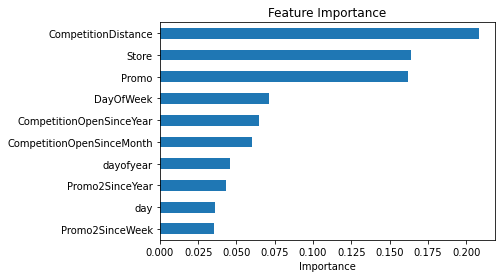

In [0]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(rfr.feature_importances_, index=x_train.columns)
feature_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Feature Importance')

RandomForest Regressor

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
rfc = RandomForestRegressor(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4]}
           
clf_randomgrid = RandomizedSearchCV(rfc, param_distributions=param_grid, cv=5)

In [0]:
clf_randomgrid.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [0]:
#best_est = clf_randomgrid.best_estimator_ 
y_pred = clf_randomgrid.predict(x_valid)
error = rmse(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.3502


In [0]:
y_predtr = clf_randomgrid.predict(x_train)
error = rmse(np.expm1(y_train), np.expm1(y_predtr))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.3970


XGBoost Regressor

In [0]:
from xgboost import XGBRegressor

In [45]:
%%time
xgb = XGBRegressor(n_estimators=500,objective='reg:squarederror',max_depth = 10,subsample= .9,learning_rate=0.03,colsample_bytree= 0.7,silent= 1)


CPU times: user 26 µs, sys: 1e+03 ns, total: 27 µs
Wall time: 29.1 µs


In [46]:
%%time
xgb.fit(x_train, y_train)

CPU times: user 14min 59s, sys: 713 ms, total: 14min 59s
Wall time: 15min


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=1, subsample=0.9, verbosity=1)

In [47]:
y_pred = xgb.predict(x_valid)
error = rmse(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1509


In [48]:
y_predtr = xgb.predict(x_train)
error = rmse(np.expm1(y_train), np.expm1(y_predtr))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1462


In [44]:
%%time
xgb = XGBRegressor(n_estimators=4000,objective='reg:squarederror',eta=0.03,max_depth = 10,subsample= .9,learning_rate=0.03,colsample_bytree= 0.7,silent= 1)

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 34.1 µs


In [0]:
test_close_ind = np.where(test1["Open"] == 0)[0]

In [46]:
%%time
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_valid)
error = rmse(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1231
CPU times: user 2h 1min 40s, sys: 3.03 s, total: 2h 1min 43s
Wall time: 2h 1min 47s


In [47]:
y_predtr = xgb.predict(x_train)
error = rmse(np.expm1(y_train), np.expm1(y_predtr))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.0646


In [0]:
pred = np.expm1(xgb.predict(test1))
pred[test_close_ind] = 0
submission = pd.DataFrame({"Id": test_ID, "Sales": pred},
                          columns=["Id", "Sales"])
submission.to_csv("submission.csv", index=False)


In [0]:
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb, file)

In [50]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.03, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=1, subsample=0.9, verbosity=1)